# Cabs Project

## Introduction


The present document is a study on data about UPDATED lalalal


## Data Preprocess

### Objective


Three tables were provided:

Company - information on companies and the amount of trips during November 15 and 16 of 2017.

Dropoff - Drop off neighborhoods and the average number of trips ending at each during November 2017.

Weather - weather conditions during rides from Loop to the O'Hare Airport.


The first step is to explore data and validate information. Our final objective is to delineate patterns between different platforms, genres and consumers.

Data often comes with a few unpredicted issues, and these will be fixed in this preprocessing section. These can include missing values, artifacts and incorrect data types. Analysis is much easier when the data is standardized and categorized. At the end of this section, we expect to have data ready for analysis and the drawing of results.


In this subsection, we will take a first look at the data and the information available. It's important to make sure that the values are correctly loaded: numeric data should correctly be assigned as integer or float, corresponding to their values. Likewise, dates must also be correctly parsed by the software.


### Code

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import numpy
import scipy.stats as st


path_array = ['', '/', '/datasets/', './datasets/', '../datasets/']
CSVPATH = None

for i in path_array:
    try:
        pd.read_csv(i + 'project_sql_result_01.csv', nrows=1)
        CSVPATH = i
    except:
        pass

if CSVPATH:
    print('Path found is', 'current folder' if CSVPATH == '' else CSVPATH)
else:
    print('No path found')

Path found is ../datasets/


In [124]:
def optimize_types(df):
    df_dtypes = df.dtypes
    df_names = df.index
    df_types = [i.name for i in df_dtypes.values]
    df_types = dict(zip(df_names, df_types))
    return df_types

In [125]:
company = pd.read_csv(CSVPATH + 'project_sql_result_01.csv', nrows=10)

company['trips_amount'] = pd.to_numeric(company['trips_amount'], downcast='integer')

company_types = optimize_types(company)

company = pd.read_csv(
    CSVPATH+'project_sql_result_01.csv', 
    dtype=company_types)

company.info()
company.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int16
dtypes: int16(1), object(1)
memory usage: 768.0+ bytes


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [126]:
dropoff = pd.read_csv(CSVPATH + 'project_sql_result_04.csv', nrows=10)
dropoff['average_trips'] = pd.to_numeric(dropoff['average_trips'], downcast='float')

dropoff_types = optimize_types(dropoff)

dropoff = pd.read_csv(
    CSVPATH+'project_sql_result_04.csv', 
    dtype=dropoff_types)

dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float32
dtypes: float32(1), object(1)
memory usage: 1.2+ KB


In [127]:
weather = pd.read_csv(CSVPATH + 'project_sql_result_07.csv')

weather['duration_seconds'] = pd.to_numeric(weather['duration_seconds'], downcast='integer')

weather_types = optimize_types(weather)

weather = pd.read_csv(
    CSVPATH+'project_sql_result_07.csv', 
    dtype=weather_types,
    parse_dates=['start_ts'],
    infer_datetime_format='%Y-%m-%d %H:%M:%S')

weather.info()
weather['day_hour'] = weather['start_ts'].apply(lambda x: x.hour)
weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null datetime64[ns]
weather_conditions    1068 non-null object
duration_seconds      1068 non-null int16
dtypes: datetime64[ns](1), int16(1), object(1)
memory usage: 18.9+ KB


,start_ts,weather_conditions,duration_seconds,day_hour
0,2017-11-25 16:00:00,Good,2410,16
1,2017-11-25 14:00:00,Good,1920,14
2,2017-11-25 12:00:00,Good,1543,12
3,2017-11-04 10:00:00,Good,2512,10
4,2017-11-11 07:00:00,Good,1440,7


In [128]:
'Number of duplicates on weather: ' + str(weather[weather.duplicated()].shape[0])

'Number of duplicates on weather: 197'

### Results

resultados


## Exploratory Data Analysis



### Objective



### Code

In [129]:
top_companies = company.sort_values('trips_amount', ascending=False).head(10)
display(top_companies)
company.describe().round(decimals=2)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


,trips_amount
count,64.00
mean,2145.48
std,3812.31
min,2.00
25%,20.75
50%,178.50
75%,2106.50
max,19558.00


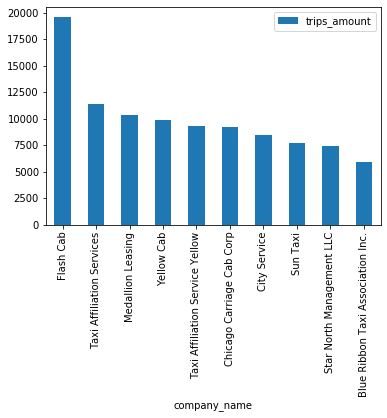

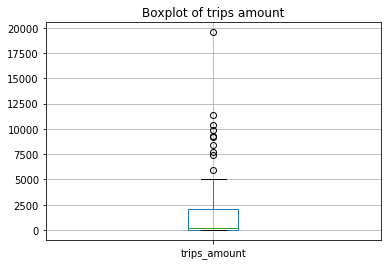

In [130]:
top_companies.set_index('company_name').plot(kind='bar')
plt.show()
company.boxplot()
plt.title('Boxplot of trips amount')
plt.show()

In [131]:
top_dropoff = dropoff.sort_values('average_trips', ascending=False).head(10)
display(top_dropoff)
dropoff.describe()

,dropoff_location_name,average_trips
0,Loop,10727.466797
1,River North,9523.666992
2,Streeterville,6664.666504
3,West Loop,5163.666504
4,O'Hare,2546.899902
5,Lake View,2420.966553
6,Grant Park,2068.533447
7,Museum Campus,1510.000000
8,Gold Coast,1364.233276
9,Sheffield & DePaul,1259.766724


,average_trips
count,94.000000
mean,599.953735
std,1714.591064
min,1.800000
25%,14.266667
50%,52.016666
75%,298.858330
max,10727.466797


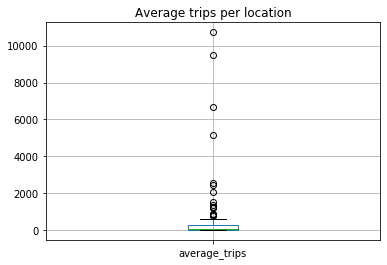

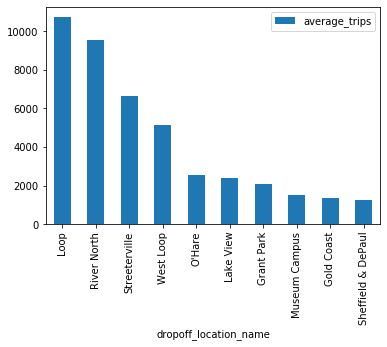

In [132]:
dropoff.boxplot()
plt.title('Average trips per location')
plt.show()
top_dropoff.set_index('dropoff_location_name').plot(kind='bar')
plt.show()

In [133]:
weather = weather.query('duration_seconds > 60')
weather.groupby('weather_conditions').describe().transpose().round(2)

weather_conditions          Bad     Good
duration_seconds count   180.00   881.00
                 mean   2427.21  2015.50
                 std     721.31   741.06
                 min     480.00   420.00
                 25%    1962.00  1404.00
                 50%    2540.00  1800.00
                 75%    2928.00  2460.00
                 max    4980.00  7440.00
day_hour         count   180.00   881.00
                 mean     13.57    10.99
                 std       3.75     4.02
                 min       0.00     0.00
                 25%      10.00     8.00
                 50%      16.00    11.00
                 75%      16.25    14.00
                 max      21.00    23.00

In [134]:
 weather_by_hour = weather.pivot_table(
     index='day_hour', 
     columns='weather_conditions', 
     values='duration_seconds',
     aggfunc=['mean', 'count']
 )

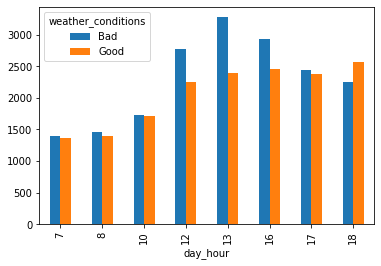

In [135]:
filtered_weather_by_hour = weather_by_hour[ weather_by_hour['count']['Bad'] > 10 ]['mean']
filtered_weather_by_hour.plot(kind='bar')
plt.show()

### Results

## Hypothesis Testing

### Objective

Average trip duration to O'Hare airport changes on rainy days

### Code

In [136]:
alpha = 0.05

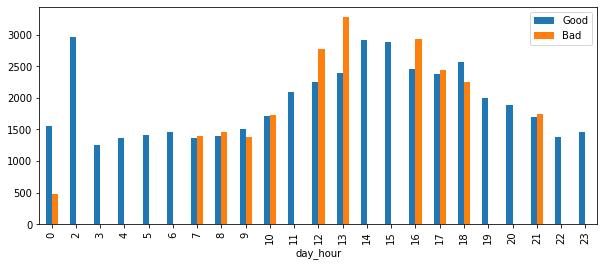

In [170]:
good = weather.query('weather_conditions == "Good"').sort_values('day_hour')
bad = weather.query('weather_conditions == "Bad"').sort_values('day_hour')
(
good.groupby('day_hour')['duration_seconds'].mean().to_frame(name='Good').join(
bad.groupby('day_hour')['duration_seconds'].mean().to_frame(name='Bad'))
).plot(kind='bar', figsize=(10,4))
plt.show()

In [178]:
hours_bad_data_available = bad.groupby('day_hour').count().query('start_ts > 10')['start_ts'].index

hours_bad_data_available

Int64Index([7, 8, 10, 12, 13, 16, 17, 18], dtype='int64', name='day_hour')

In [179]:
p_value_array = []

for hour in hours_bad_data_available:
    p_value_array.append(
        st.ttest_ind(
            good.query('day_hour == @hour')['duration_seconds'].values, 
            bad.query('day_hour == @hour')['duration_seconds'].values, 
            equal_var=False
        ).pvalue
    )

pd.Series(index=bad_hour_count, data=p_value_array, name='p_values')

day_hour
7     0.373278
8     0.095822
10    0.863807
12    0.000285
13    0.000007
16    0.000001
17    0.511759
18    0.097477
Name: p_values, dtype: float64

In [173]:
hour_array = [12, 13, 16]
raise_in_mean = 0
for hour in hour_array:
    raise_in_mean += (
        bad[ bad['day_hour'] == i].mean()
        /
        good[ good['day_hour'] == i ].mean()
    )['duration_seconds']

raise_in_mean /= 3
f"The raise in trip durations due to bad weather is {raise_in_mean - 1:.2%}"

'The raise in trip durations due to bad weather is 19.80%'

In [192]:
result = st.ttest_ind(
    good.query('day_hour.isin(@hours_bad_data_available)')['duration_seconds'].values,
    bad.query('day_hour.isin(@hours_bad_data_available)')['duration_seconds'].values,
    equal_var=False
)

print(f'The resulting p-value is {result.pvalue:.2f}')
if result.pvalue > alpha:
    print('It is too high, so the null hypothesis can\'t be rejected. The batches could come from the same populations')
else:
    print('It is too low, the null hypothesis is rejected. The batches probably come from different populations')

The resulting p-value is 0.00
It is too low, the null hypothesis is rejected. The batches probably come from different populations


### Results

## Conclusion